In [115]:
def normalise(pitch,yaw,roll):
    mean_pitch = np.mean(pitch)
    std_pitch = np.std(pitch)

    mean_yaw = np.mean(yaw)
    std_yaw = np.std(yaw)

    mean_roll = np.mean(roll)
    std_roll = np.std(roll)

    # Perform z-score normalization
    normalized_pitch = (pitch - mean_pitch) / std_pitch
    normalized_yaw = (yaw - mean_yaw) / std_yaw
    normalized_roll = (roll - mean_roll) / std_roll
    return normalized_pitch,normalized_yaw,normalized_roll

In [116]:
def calcAirpods(df):
# Extract accelerometer and gyroscope data
    accel_x = df['airpodsaccelerationX']
    accel_y = df['airpodsaccelerationY']
    accel_z = df['airpodsaccelerationZ']
    gyro_x = df['airpodsgyroX']
    gyro_y = df['airpodsgyroY']
    gyro_z = df['airpodsgyroZ']
    pitch = [0] * len(df)
    yaw = [0] * len(df)
    roll = [0] * len(df)
    # Loop through the data
    for i in range(len(df)):
        # Extract accelerometer and gyroscope readings for the current row
        ax = accel_x.iloc[i]
        ay = accel_y.iloc[i]
        az = accel_z.iloc[i]
        gx = gyro_x.iloc[i]
        gy = gyro_y.iloc[i]
        gz = gyro_z.iloc[i]

        # Calculate pitch, yaw, and roll angles using the formulas
        pitch[i] = np.arctan2(ay, np.sqrt(ax**2 + az**2))
        roll[i] = np.arctan2(-ax, np.sqrt(ay**2 + az**2))
        yaw[i] = yaw[-1] + (gx * (1/25))  # assuming sampling rate of 25 Hz and dt of 1/25

       
    pitch, yaw, roll = normalise(pitch,yaw,roll)
    data = {'pitch': pitch, 'roll': roll, 'yaw': yaw}

    # Create a pandas DataFrame from the dictionary
    return data


In [117]:
import math
def calcIphone(df):
# Extract accelerometer and gyroscope data
    accel_x = df['iPhoneaccelerationX']
    accel_y = df['iPhoneaccelerationY']
    accel_z = df['iPhoneaccelerationZ']

    gyro_x = df['iPhonegyroX']
    gyro_y = df['iPhonegyroY']
    gyro_z = df['iPhonegyroZ']

    mag_x = df['MagneticFieldX']
    mag_y = df['MagneticFieldY']
    mag_z = df['MagneticFieldZ']

    pitch = [0] * len(df)
    yaw = [0] * len(df)
    roll = [0] * len(df)
    # Loop through the data
    for i in range(len(df)):
    # Calculate pitch angle
        pitch[i] = math.atan2(accel_y.iloc[i], math.sqrt(accel_x.iloc[i] ** 2 + accel_z.iloc[i] ** 2))

        # Calculate roll angle
        roll[i] = math.atan2(-accel_x.iloc[i], math.sqrt(accel_y.iloc[i] ** 2 + accel_z.iloc[i] ** 2))

        # Calculate yaw angle
        mag_xh = float(mag_x.iloc[i]) * math.cos(roll[i]) + float(mag_y.iloc[i]) * math.sin(pitch[i]) * math.sin(roll[i]) - float(mag_z.iloc[i]) * math.cos(pitch[i]) * math.sin(roll[i])
        mag_yh = float(mag_y.iloc[i]) * math.cos(pitch[i]) + float(mag_z.iloc[i]) * math.sin(pitch[i])
        yaw[i] = math.atan2(-mag_yh, mag_xh)
    pitch, yaw, roll = normalise(pitch,yaw,roll)

    data = {'pitchphone': pitch, 'rollphone': roll, 'yawphone': yaw}
    # Create a pandas DataFrame from the dictionary
    return data


In [485]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy import signal



airpods_df = pd.read_csv('airpodsdata.csv',  usecols=['ParticipantID', 'TrialID', 'Label', 'Device', 'Time','AccelerationX','AccelerationY'
        ,'AccelerationZ','RotationRateX','RotationRateY','RotationRateZ'])
airpods_df = airpods_df.rename(columns={'AccelerationX': 'airpodsaccelerationX', 'AccelerationY': 'airpodsaccelerationY', 'AccelerationZ': 'airpodsaccelerationZ','RotationRateX': 'airpodsgyroX' ,'RotationRateY': 'airpodsgyroY' ,'RotationRateZ': 'airpodsgyroZ' })
iphone_df = pd.read_csv('iphonedata.csv', usecols=['ParticipantID', 'TrialID', 'Label', 'Device', 'Time','AccelerationX','AccelerationY'
        ,'AccelerationZ','RotationRateX','RotationRateY','RotationRateZ','MagneticFieldX','MagneticFieldY'
        ,'MagneticFieldZ'])
iphone_df = iphone_df.rename(columns={'AccelerationX': 'iPhoneaccelerationX', 'AccelerationY': 'iPhoneaccelerationY', 'AccelerationZ': 'iPhoneaccelerationZ','RotationRateX': 'iPhonegyroX' ,'RotationRateY': 'iPhonegyroY' ,'RotationRateZ': 'iPhonegyroZ' })

airpods_df2 = pd.read_csv('airpodsdata2.csv',  usecols=['ParticipantID', 'TrialID', 'Label', 'Device', 'Time','AccelerationX','AccelerationY'
        ,'AccelerationZ','RotationRateX','RotationRateY','RotationRateZ'])
airpods_df2 = airpods_df2.rename(columns={'AccelerationX': 'airpodsaccelerationX', 'AccelerationY': 'airpodsaccelerationY', 'AccelerationZ': 'airpodsaccelerationZ','RotationRateX': 'airpodsgyroX' ,'RotationRateY': 'airpodsgyroY' ,'RotationRateZ': 'airpodsgyroZ' })
iphone_df2 = pd.read_csv('iphonedata2.csv', usecols=['ParticipantID', 'TrialID', 'Label', 'Device', 'Time','AccelerationX','AccelerationY'
        ,'AccelerationZ','RotationRateX','RotationRateY','RotationRateZ','MagneticFieldX','MagneticFieldY'
        ,'MagneticFieldZ'])
iphone_df2 = iphone_df2.rename(columns={'AccelerationX': 'iPhoneaccelerationX', 'AccelerationY': 'iPhoneaccelerationY', 'AccelerationZ': 'iPhoneaccelerationZ','RotationRateX': 'iPhonegyroX' ,'RotationRateY': 'iPhonegyroY' ,'RotationRateZ': 'iPhonegyroZ' })
#format data
airpods_df = pd.concat([ airpods_df,airpods_df2])
iphone_df = pd.concat([ iphone_df,iphone_df2])

# concatenate the two dataframes
df = pd.concat([ airpods_df,iphone_df])

# Replace the character immediately preceding the time with a space
df['Time'] = df['Time'].str.replace(' ', '')
# Add a space between the time and date
df['Time'] = df['Time'].str.replace(r'(\d{4}/\d{2}/\d{2})(\d{2}:\d{2}:\d{2}.\d{3})', r'\1 \2')
# convert the time column to datetime object
df['Time'] = pd.to_datetime(df['Time'])
# sort the dataframe by time column
df = df.sort_values(by='Time')


# Fill missing values with the previous non-missing row
df.fillna(method='bfill', inplace=True)
df.drop_duplicates(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)
# Save the cleaned dataframe to a new CSV file
df = df.iloc[::2, :]
df = df.fillna(0)

df = df[df['Label'].isin(['hand right', 'hand left','hand up','hand down','hand clockwise circle','standing still'])]
#df = df[df['Label'].isin(['head right', 'head left','head up','head down','head clockwise circle','standing still'])]
#df = df[df['Label'].isin(['hand right, head right', 'hand left, head left','hand up, head up','hand down, head down','hand clockwise circle, head clockwise circle','standing still'])]
#df = df[df['Label'] != "standing still"]
# Reset the index if needed
#df.reset_index(drop=True, inplace=True)


/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/1431170526.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace(r'(\d{4}/\d{2}/\d{2})(\d{2}:\d{2}:\d{2}.\d{3})', r'\1 \2')


In [486]:
def preprocess(df):
    df = df.drop('ParticipantID', axis=1)
    df = df.drop('Time', axis=1)

    data = {'TrialID': df['TrialID'], 'Label': df['Label']}
    airpodsdata = calcAirpods(df)
    iphonedata = calcIphone(df)
    data2 = {'airpodsgyroX': df['airpodsgyroX'], 'airpodsgyroY': df['airpodsgyroY'], 'airpodsgyroZ': df['airpodsgyroZ'], 'iPhonegyroX': df['iPhonegyroX'], 'iPhonegyroY': df['iPhonegyroY'], 'iPhonegyroZ': df['iPhonegyroZ']}

    combined_dict = {}
    combined_dict.update(data)
    combined_dict.update(airpodsdata)
    combined_dict.update(iphonedata)
    combined_dict.update(data2)

    df2 = pd.DataFrame(combined_dict)
 
    df_subset = df[9:]
    selected_cols2 = df_subset[['Label','TrialID']]
    newdf = df2[['yaw', 'pitch','roll','pitchphone','yawphone','rollphone','airpodsgyroX','airpodsgyroY','airpodsgyroZ','iPhonegyroX','iPhonegyroY','iPhonegyroZ']]
    newdfcopy = newdf.copy()

    newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
    newdf['varyaw'] = newdfcopy['yaw'].rolling(window=10).var()
    newdf['varroll'] = newdfcopy['roll'].rolling(window=10).var()
    newdf['varpitchphone'] = newdfcopy['pitchphone'].rolling(window=10).var()
    newdf['varyawphone'] = newdfcopy['yawphone'].rolling(window=10).var()
    newdf['varrollphone'] = newdfcopy['rollphone'].rolling(window=10).var()

    newdf['airpodsgyroX'] = newdfcopy['airpodsgyroX'].rolling(window=10).median()
    newdf['airpodsgyroY'] = newdfcopy['airpodsgyroY'].rolling(window=10).median()
    newdf['airpodsgyroZ'] = newdfcopy['airpodsgyroZ'].rolling(window=10).median()
    newdf['iPhonegyroX'] = newdfcopy['iPhonegyroX'].rolling(window=10).median()
    newdf['iPhonegyroY'] = newdfcopy['iPhonegyroY'].rolling(window=10).median()
    newdf['iPhonegyroZ'] = newdfcopy['iPhonegyroZ'].rolling(window=10).median()
    newdf = newdf[9:]


    df = pd.concat([selected_cols2, newdf], axis=1)
 

    return df



In [487]:
def dataset(df, window):
    xtrain,ytrain = [],[]
    xtest,ytest = [],[]
    for i in range(0, len(df),48):
        #preporcess data
        data = preprocess(df.iloc[i:(i + window)]) 
        if(len(data['TrialID']) == 39):
            if data.iloc[round(len(data['TrialID'])/2),1] < 9:
                ytrain.append(data.iloc[round(len(data['Label'])/2),0])
                data = data.drop('TrialID', axis=1)
                data = data.drop('Label', axis=1)
                xtrain.append(data.values)
            else:
                ytest.append(data.iloc[round(len(data['Label'])/2),0])
                data = data.drop('TrialID', axis=1)
                data = data.drop('Label', axis=1)
                xtest.append(data.values)

    return np.array(xtrain), np.array(ytrain).reshape(-1, 1),np.array(xtest), np.array(ytest).reshape(-1, 1)

#apply windowing to data
xtrain, ytrain,xtest,ytest = dataset(df,48)








/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying 

39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39


/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying 

39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39


/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying 

39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39


/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying 

39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39


/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying 

39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39


/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying 

39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39


/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying 

39
39
10
6451


/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()
/var/folders/2n/rrrm1mjd0qn4zv0bbwghrdnw0000gq/T/ipykernel_26666/3199296970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['varpitch'] = newdfcopy['pitch'].rolling(window=10).var()


In [488]:
from sklearn.preprocessing import OneHotEncoder
#encode labels
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc = enc.fit(ytrain)
ytrain = enc.transform(ytrain)
ytest = enc.transform(ytest)





In [489]:
import numpy as np
import pandas as pd
import tensorflow as tf

from scipy import stats
from sklearn.metrics import confusion_matrix
import glob, os
from tensorflow import keras

import matplotlib.pyplot as plt


from keras import regularizers


def create_model(X_train, y_train):
    model = keras.Sequential()
    model.add(
        keras.layers.Bidirectional(
          keras.layers.LSTM(
              units=128,
              input_shape=[X_train.shape[1], X_train.shape[2]],
             
          )
        )
    )
    model.add(keras.layers.Dropout(rate=0.5))
    model.add(keras.layers.Dense(units=128, activation='relu'))
    model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  
    return model

#create lstm model
model = create_model(xtrain, ytrain)
#train model
history = model.fit(
    xtrain, ytrain,
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
4/4 [==============================] - 2s 157ms/step - loss: 1.7747 - acc: 0.1753 - val_loss: 1.8183 - val_acc: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 29ms/step - loss: 1.5242 - acc: 0.5670 - val_loss: 1.7056 - val_acc: 0.0909
Epoch 3/10
4/4 [==============================] - 0s 31ms/step - loss: 1.3302 - acc: 0.7216 - val_loss: 1.6128 - val_acc: 0.0909
Epoch 4/10
4/4 [==============================] - 0s 28ms/step - loss: 1.1470 - acc: 0.7526 - val_loss: 1.4246 - val_acc: 0.1818
Epoch 5/10
4/4 [==============================] - 0s 31ms/step - loss: 0.9206 - acc: 0.8660 - val_loss: 1.2062 - val_acc: 0.8182
Epoch 6/10
4/4 [==============================] - 0s 28ms/step - loss: 0.7659 - acc: 0.8763 - val_loss: 1.0668 - val_acc: 0.6364
Epoch 7/10
4/4 [==============================] - 0s 28ms/step - loss: 0.5641 - acc: 0.9072 - val_loss: 1.2828 - val_acc: 0.5455
Epoch 8/10
4/4 [==============================] - 0s 31ms/step - loss: 0.4679 - acc: 0.8866 

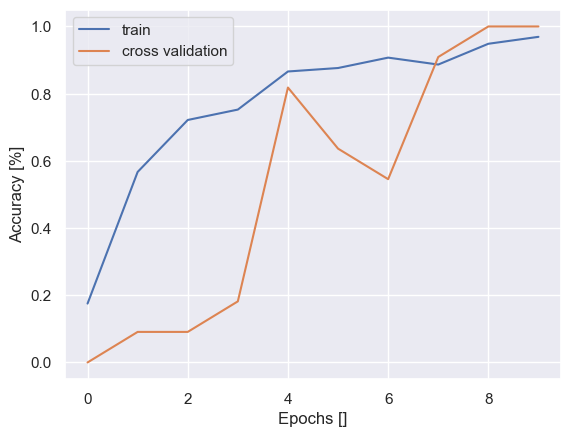

In [490]:
plt.figure()
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='cross validation')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epochs []')
plt.legend()


In [491]:
accuracy = model.evaluate(xtest, ytest)
print(accuracy[1])


from sklearn.metrics import f1_score

# make predictions on test set
y_pred = model.predict(xtest)

# convert predicted probabilities to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# convert true labels to one-hot encoding
ytest_labels = np.argmax(ytest, axis=1)

# calculate F1 score
f1score = f1_score(ytest_labels, y_pred_labels, average='weighted')

print("F1 Score:", f1score)

1/1 [==============================] - 0s 29ms/step - loss: 0.3083 - acc: 0.9615
0.9615384340286255
1/1 [==============================] - 0s 352ms/step
F1 Score: 0.9602704987320371


1/1 [==============================] - 0s 30ms/step


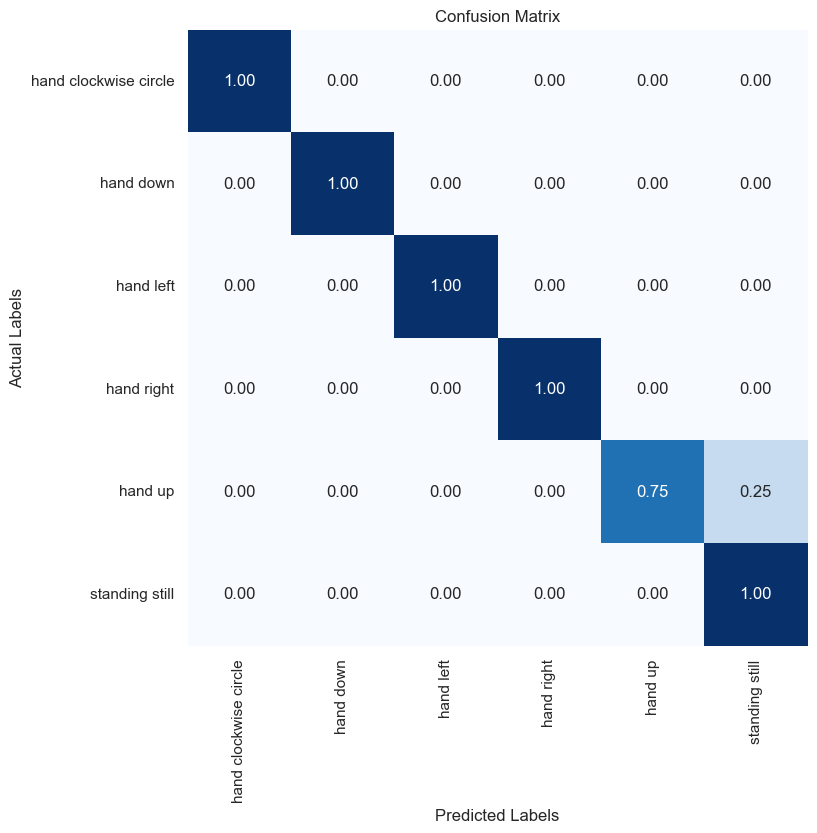

In [492]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = enc.categories_[0]  # replace with your actual class names

# make predictions on test set
y_pred = model.predict(xtest)

# convert predicted probabilities to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# convert true labels to one-hot encoding
ytest_labels = np.argmax(ytest, axis=1)

# calculate confusion matrix
cm = confusion_matrix(ytest_labels, y_pred_labels)

# normalize confusion matrix
cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# plot confusion matrix
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


2/2 [==============================] - 0s 29ms/step


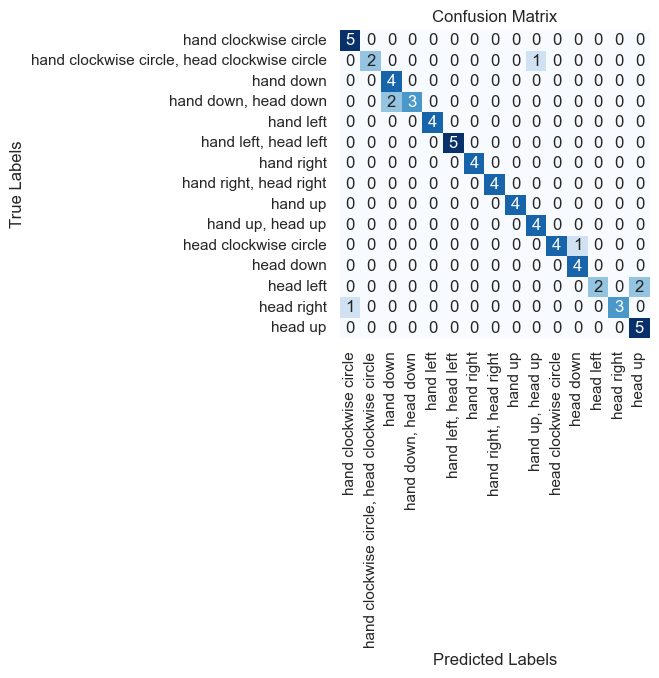

In [341]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = enc.categories_[0]  

# make predictions on test set
y_pred = model.predict(xtest)

# convert predicted probabilities to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# convert true labels to one-hot encoding
ytest_labels = np.argmax(ytest, axis=1)

# calculate confusion matrix
cm = confusion_matrix(ytest_labels, y_pred_labels)

# plot confusion matrix
plt.figure(figsize=(4,4))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [460]:
#save the model
tf.saved_model.save(model, "/Users/shelleytruong/PycharmProjects/pythonProject2/finalmodelcat3wstand")


INFO:tensorflow:Assets written to: /Users/shelleytruong/PycharmProjects/pythonProject2/finalmodelcat3wstand/assets


INFO:tensorflow:Assets written to: /Users/shelleytruong/PycharmProjects/pythonProject2/finalmodelcat3wstand/assets
